## **Fashion MNIST Image Classification**

**Benedictus Bayu Pramudhito**

In [1]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import pandas as pd

4423680/4422102 [==============================] - 0s 0us/step
Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


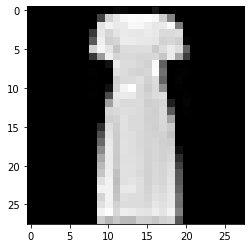

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

plt.imshow(X_train[50], cmap=plt.get_cmap('gray'))

In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

**Feature Engineering**

In [4]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
X_train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
print(y_train)

[9 0 0 ... 3 0 5]


In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
#casting features
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import SGD

**Multilayer Perceptron (Neural Network)**

In [13]:
base_model = Sequential()

base_model.add(Flatten(input_shape=(28, 28, 1)))
base_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform')) #Nilai 128 karena akan memakai 128 neuron
base_model.add(Dense(10, activation='softmax')) #Nilai 10 karena ada 10 label

opt = SGD(lr=0.01, momentum=0.9) #Optimizer Stochastic Gradient Descent, untuk mencari minima dari grafik fungsi loss

base_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) #Loss function
base_model.summary()

history = base_model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5342 - accuracy: 0.8127 - val_loss: 0.4583 - val_accuracy: 0.8342
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3952 - accuracy: 0.8575 - val_loss: 0.3928 - val_accuracy: 0.8618
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3577 - accu

In [14]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [15]:
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch
history_df

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.534192,0.812683,0.458269,0.8342,0
1,0.395208,0.857517,0.392773,0.8618,1
2,0.357730,0.870317,0.392650,0.8567,2
3,0.334607,0.877817,0.381364,0.8611,3
4,0.316621,0.884750,0.367271,0.8707,4
...,...,...,...,...,...
95,0.067756,0.975567,0.551906,0.8861,95
96,0.065975,0.976400,0.540431,0.8849,96
97,0.064012,0.976283,0.599824,0.8795,97
98,0.065969,0.975683,0.554895,0.8832,98


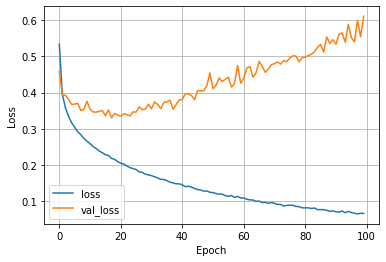

In [16]:
plot_loss(history) #epoch vs loss graph

**Kita ingin mencari loss yang terendah, loss ini terhadap val_lossnya**

Berdasarkan grafik epoch terhadap loss pada model multilayer perceptron, terlihat bahwa garis lossnya terus mengalami penurunan dengan 100 epoch, tetapi grafik val_loss nya cenderung mengalami peningkatan setelah sekitar 18 epoch. Oleh karena itu, nilai val_loss terendah diperoleh saat epochnya sekitar 18-19, tepat sebelum val_loss nya mengalami peningkatan dimana saat epoch 18 diperoleh val_loss: 0.3302 dan val_accuracy: 0.8836

In [ ]:
#loss, accuracy = base_model.evaluate(X_test, y_test, verbose=2)

#print('Test Accuracy:', round(accuracy, 3))
#print('Test Loss:', round(loss, 3))

**Convolutional Neural Network**

In [18]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))) #Convolution dengan 32 filter, masing-masing dengan kernel 3x3
model.add(MaxPooling2D((2,2)))
model.add(Flatten())

#Fully connected layer
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform')) #Memakai 100 neuron
model.add(Dense(10, activation='softmax')) #Terdapat 10 label pada dataset

opt = SGD(lr=0.01, momentum=0.9) #optimizer Stochastic Gradient Descent

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history_cnn = model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=100)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4289 - accuracy: 0.8451 - val_loss:

In [19]:
history_df_cnn = pd.DataFrame(history_cnn.history)
history_df_cnn['epoch'] = history_cnn.epoch
history_df_cnn

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.428864,0.845133,0.347906,0.8757,0
1,0.291934,0.892517,0.321149,0.8819,1
2,0.246528,0.909650,0.292845,0.8940,2
3,0.218327,0.918400,0.290489,0.8965,3
4,0.196180,0.927350,0.265076,0.9079,4
...,...,...,...,...,...
95,0.000097,1.000000,0.717655,0.9120,95
96,0.000096,1.000000,0.718555,0.9116,96
97,0.000094,1.000000,0.719564,0.9121,97
98,0.000093,1.000000,0.720375,0.9122,98


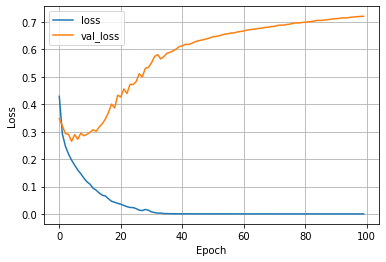

In [20]:
plot_loss(history_cnn)

**Kita ingin mencari loss yang terendah, loss ini terhadap val_lossnya**

Berdasarkan grafik epoch terhadap loss pada model multilayer perceptron, terlihat bahwa garis lossnya telah mencapai titik terendahnya dengan 100 epoch, tetapi grafik val_loss nya cenderung mengalami peningkatan setelah sekitar 5 epoch. Oleh karena itu, nilai val_loss terendah diperoleh saat epochnya sekitar 5-6, tepat sebelum val_loss nya mengalami peningkatan dimana saat epoch 5 diperoleh val_loss: 0.2651 dan val_accuracy: 0.9079

In [ ]:
#loss, accuracy = model.evaluate(X_test, y_test, verbose=2)

#print('Test Accuracy:', round(accuracy, 3))
#print('Test Loss:', round(loss, 3))

**Convolutional Neural Network with Deeper Layer**

In [22]:
model = Sequential([Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
                   MaxPooling2D((2,2)),
                   Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform'),
                   MaxPooling2D((2,2)),
                   Flatten(),
                   Dense(100, activation='relu', kernel_initializer='he_uniform'),
                   Dense(10, activation='softmax')
])

In [23]:
model.compile(optimizer=SGD(lr=0.01, momentum=0.9), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [24]:
model.summary()

history_cnn_1 = model.fit(
    X_train,
    y_train,
    batch_size=32,
    validation_data = (X_test, y_test),
    epochs=100
)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               160100    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [25]:
history_df_cnn1 = pd.DataFrame(history_cnn_1.history)
history_df_cnn1['epoch'] = history_cnn_1.epoch
history_df_cnn1

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.455989,0.833467,0.363715,0.8686,0
1,0.305962,0.888050,0.335452,0.8785,1
2,0.262866,0.903300,0.299051,0.8876,2
3,0.233967,0.913117,0.298056,0.8950,3
4,0.213919,0.920400,0.265717,0.9031,4
...,...,...,...,...,...
95,0.000023,1.000000,0.911845,0.9169,95
96,0.000023,1.000000,0.912274,0.9171,96
97,0.000023,1.000000,0.913438,0.9171,97
98,0.000022,1.000000,0.914335,0.9170,98


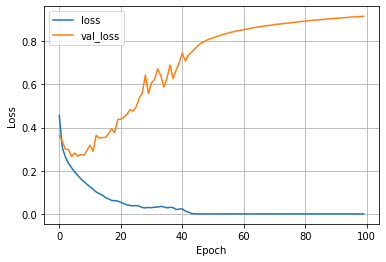

In [26]:
  plot_loss(history_cnn_1)

**Kita ingin mencari loss yang terendah, loss ini terhadap val_lossnya**

Berdasarkan grafik epoch terhadap loss pada model multilayer perceptron, terlihat bahwa garis lossnya telah mencapai titik terendahnya dengan 100 epoch, tetapi grafik val_loss nya cenderung mengalami peningkatan setelah sekitar 10 epoch. Oleh karena itu, nilai val_loss terendah diperoleh saat epochnya sekitar 10-11, tepat sebelum val_loss nya mengalami peningkatan dimana saat epoch 10 diperoleh val_loss: 0.2942 dan val_accuracy: 0.9016

In [ ]:
#loss, accuracy = model.evaluate(X_test, y_test, verbose=2)

#print('Test Accuracy:', round(accuracy, 3))
#print('Test Loss:', round(loss, 3))

Nilai akurasi pada model CNN single layer sebesar 0.9079 dan pada model CNN dengan deeper layer nilainya sedikit lebih rendah yakni 0.9016. Penambahan layer yang lebih dalam sebenarnya membuat model mampu mengambil feature dengan lebih banyak namun belum tentu menghasilkan model yang lebih baik. Seperti pada dataset MNIST dimana penambahan layer malah sedikit menurunkan performa dari model
